<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Compare-every-iterations" data-toc-modified-id="Compare-every-iterations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare every iterations</a></span></li><li><span><a href="#COMPARE-TWO-STOPPING-CRITERIA" data-toc-modified-id="COMPARE-TWO-STOPPING-CRITERIA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>COMPARE TWO STOPPING CRITERIA</a></span></li><li><span><a href="#Plot-the-total-balance-across-fields" data-toc-modified-id="Plot-the-total-balance-across-fields-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot the total balance across fields</a></span></li></ul></div>

# Load

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path

import pandas as pd


In [25]:
n_nodes=10
subfolder='ni_comparison'


In [26]:
path='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder
path2='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder


In [42]:
print(os.listdir(path))

['output_L_10000_ni_10000_no_20_ev_0.pkl', 'output_L_10000_ni_1000_no_20_ev_0.pkl', 'output_L_10000_ni_10_no_20_ev_0.pkl', 'output_L_10000_ni_100_no_20_ev_0.pkl']


In [45]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_10000_no_20_ev_0.pkl


# Compare every iterations

In [30]:
from result_analysis import plot_stop_and_cost

In [31]:
len(opt_res)

20

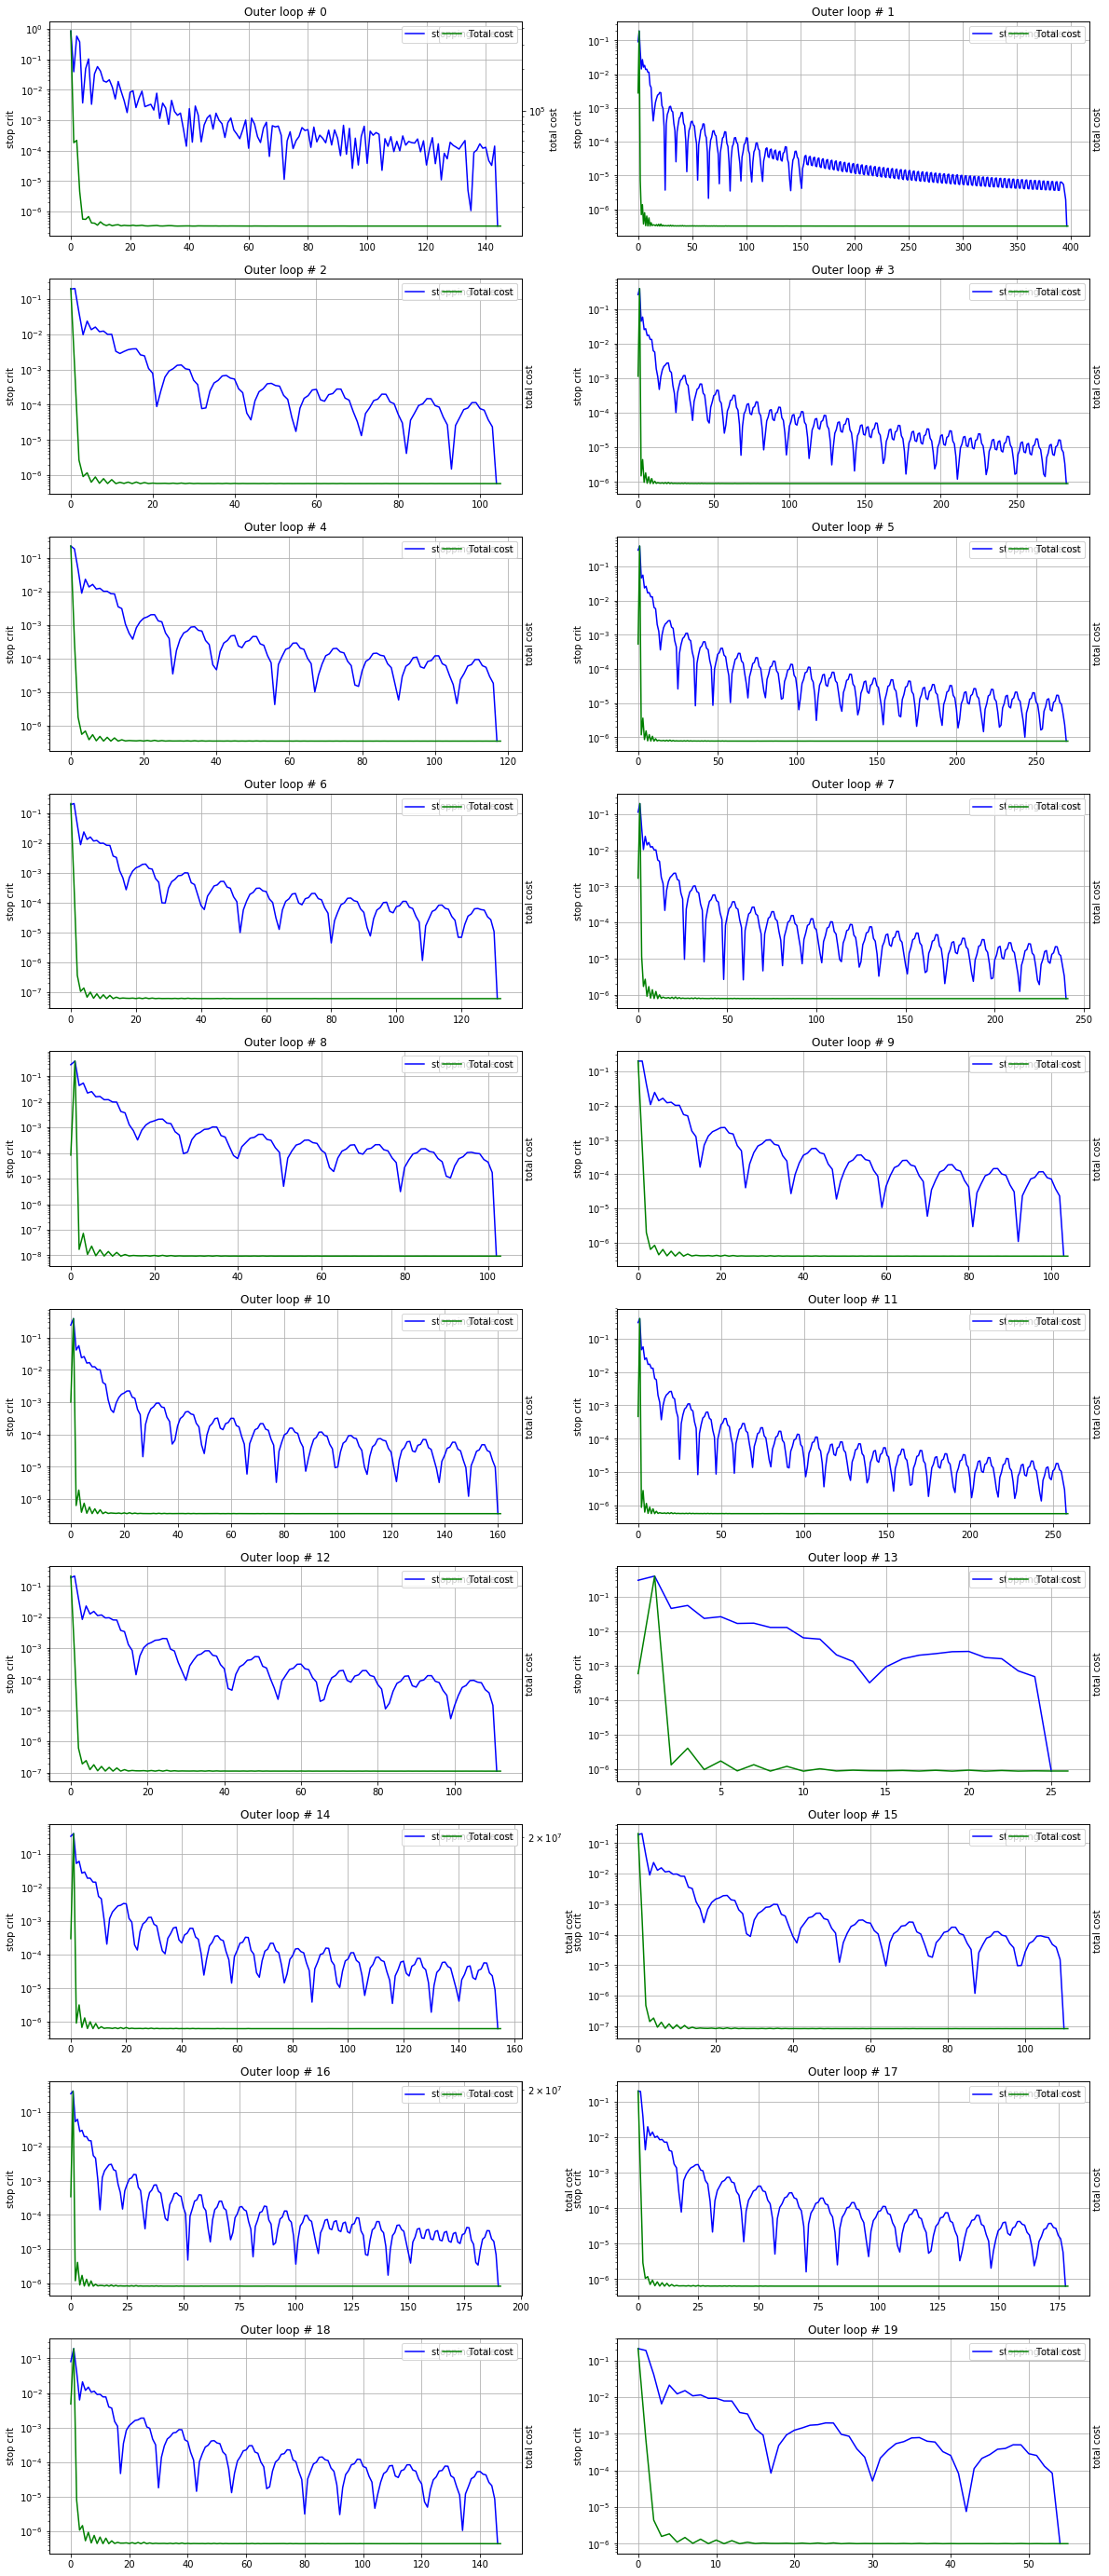

In [46]:
plot_stop_and_cost(opt_res)

Above : very interesting to see jumps in the total cost and in the stopping criterion... (it makes sense)
But I had never seen such jumps in total costs. We would have to see why that is the case. 

What generates those huge bumps in total cost? 
I have to analyze everything around those bumps. 

WWhat is the consequence of those bumps? Simple: we go "back in time" and therefore the relative progress does not decrease enough. Therefore we do not reach the limit we want

Note: the balance is directly correlated to the value of the total cost at the end of the iteration

The bump problem seems to appear with larger graphs (25 nodes) -- not 10 nodes

Regarding the balance
- it is interesting to see that with the new stopping criterion we perform worse with 10 nodes than with the previous criterion. 
- We are exepcting to see decreasing balance norm with an increasing number of maximum iterations. However, we do not see difference between ni = 100 or ni = 1000. 

Very confusing. The only explanation I can come up with right now is the very duration of iterations (with 10 nodes, we reach FW every time) and therefore the performance does not vary with ni any more. 

But we do not reach the same level of balance (one order of magnitude higher). 

# COMPARE TWO STOPPING CRITERIA

We do not get the same results (balance, etc) so we have to investigate. 

We have two different stopping criteria
- rel progress
- duality gap

Can we see the difference in terms of performance and accuracy? 

Why do I want to do this? 

Simply because there is a difference in where it converges to between the two stopping criteria for 25 nodes I think

# Plot the total balance across fields

In [33]:
from generate_figure import plot_balance



In [34]:
path='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder

output_L_10000_ni_10000_no_20_ev_0.pkl
output_L_10000_ni_1000_no_20_ev_0.pkl
output_L_10000_ni_10_no_20_ev_0.pkl
output_L_10000_ni_100_no_20_ev_0.pkl


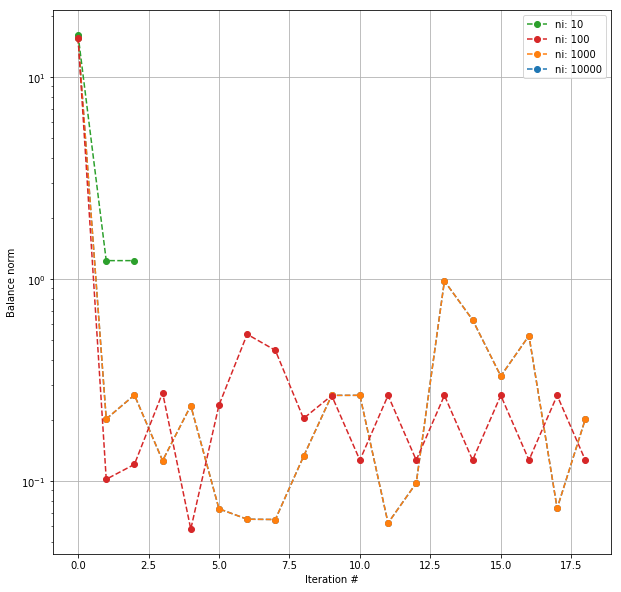

In [40]:
plot_balance(path=str(n_nodes)+'Nodes/', path_c='rel_prog/'+subfolder, shift=2, save=False)

In [37]:
len(G_FW)

21

What do we see: if we increase the number of inner iterations: we do not converge better or in fewer outer iterations at some stage -- very weird considering we should only be better... 

Saving: 

- I have to change the way it is saved because we currently save way too much data